In [2]:
# carregando as bibliotecas4

## trabalhar com os dados
import pandas as pd

## separar base em treino teste
from sklearn.model_selection import train_test_split

## modelos/algoritmos

from sklearn.ensemble import RandomForestClassifier

## Métricas de acurácia

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

## trabalhar com figuras

import seaborn as sns
import matplotlib.pyplot as plt 

## selecionar variaveis importantes

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

## tunar parametros

from sklearn.model_selection import GridSearchCV

In [3]:
url = 'https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv'

df = pd.read_csv(url)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
# separando em preditoras e respostaa

x = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [5]:
SEED = 50
SEED2 = 2

x_treino,x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED,
                                                       test_size= 0.3, stratify=y)

In [6]:
modelo  = RandomForestClassifier(n_estimators=20, random_state=SEED2)

In [7]:
parametros_busca = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2] 
}

In [8]:
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=parametros_busca,
                           scoring='accuracy',
                           cv = 5,
                           n_jobs=-1)

In [9]:
grid_search.fit(x_treino, y_treino) 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=20, random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [11]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [12]:
parametros = {'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state': 2}

In [13]:
modelo = RandomForestClassifier(**parametros)

In [14]:
selecionador = RFE(modelo, n_features_to_select=10, step = 1)

In [15]:
selecionador.fit(x_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [16]:
x_treino_selecionado = selecionador.transform(x_treino)
x_teste_selecionado = selecionador.transform(x_teste)

In [17]:
modelo.fit(x_treino_selecionado, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [18]:
modelo.score(x_teste_selecionado,y_teste)

0.9126317844591956

In [19]:
y_pred = modelo.predict(x_teste_selecionado)


In [20]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

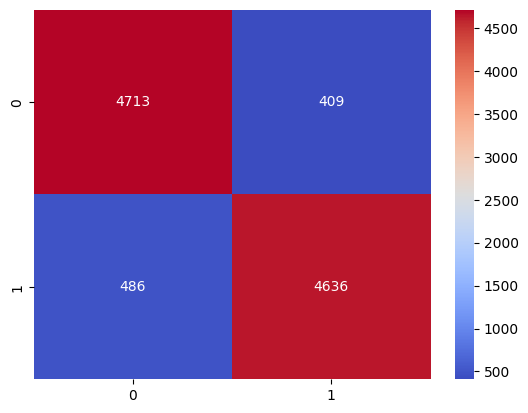

In [26]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')